Q1


Data loading


In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1Qb8I8YAGQYxmAa3aFl0eB8CoocFtiQpV
!gdown 1PeQVXfT-aYBH0V1mn7ovo6yp3fq7WjdK

Downloading...
From: https://drive.google.com/uc?id=1Qb8I8YAGQYxmAa3aFl0eB8CoocFtiQpV
To: /content/BankChurners.csv
100% 1.51M/1.51M [00:00<00:00, 125MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PeQVXfT-aYBH0V1mn7ovo6yp3fq7WjdK
To: /content/data.npy
100% 928/928 [00:00<00:00, 3.96MB/s]


 Adding libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

1.1


Reading and examining data attributes

In [ ]:
# Read the CSV file into a DataFrame
data = pd.read_csv('BankChurners.csv')

# Check the data type of each column
print(data.dtypes)

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [ ]:
#A closer look at the data
print(data.info())


print("*******************")


#Checking the number of features and samples (rows and columns)
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

1.2

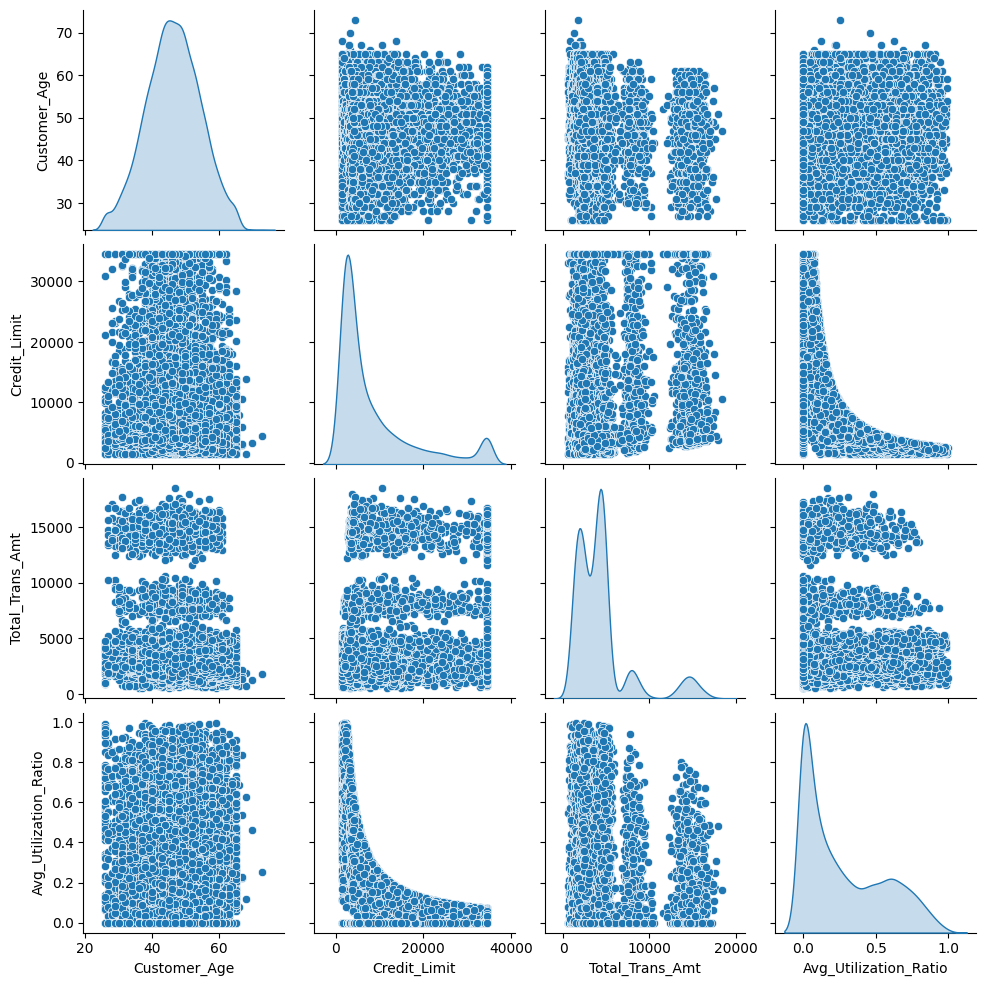

In [ ]:
# Select multiple features to display
selected_features = ['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']

# Draw pairplot
sns.pairplot(data[selected_features], diag_kind='kde', markers='o')

# Show chart
plt.show()

1.3

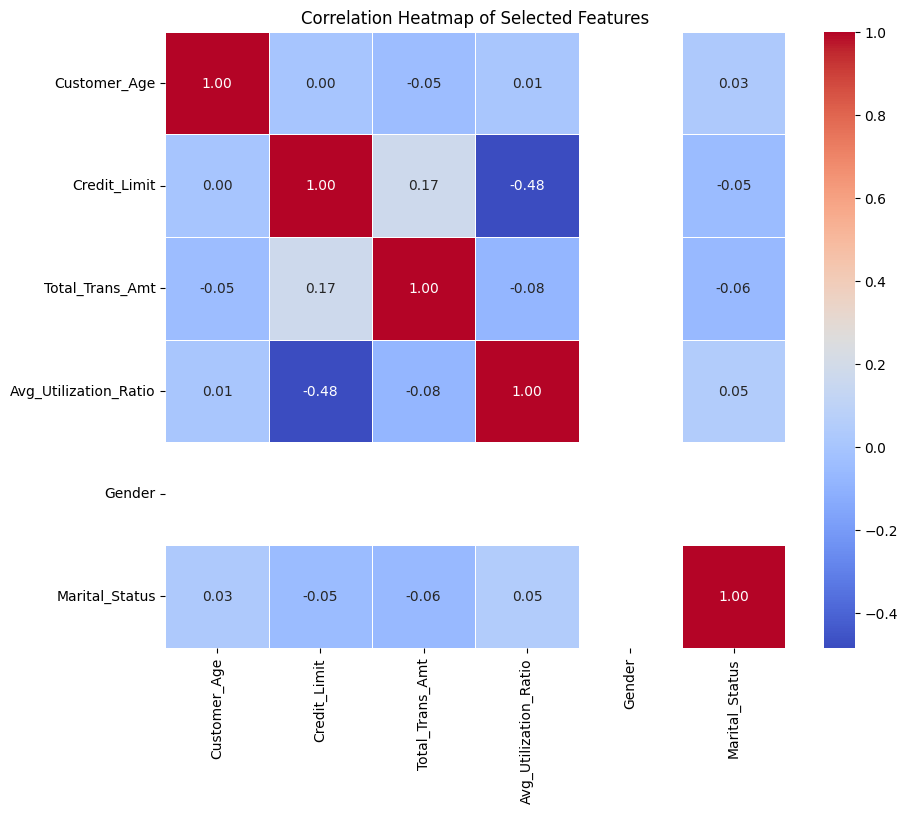

In [ ]:
# Selecting continuous and categorical features
continuous_features = ['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']
categorical_features = ['Gender', 'Marital_Status']

# Coding of classified features
data_encoded = data.copy()
data_encoded['Gender'] = data_encoded['Gender'].map({'Male': 0, 'Female': 1})  # کدگذاری جنسیت
data_encoded['Marital_Status'] = data_encoded['Marital_Status'].map({'Single': 0, 'Married': 1})  # کدگذاری وضعیت تأهل

# Select features to calculate correlation
selected_features = continuous_features + categorical_features

# Calculate the correlation matrix
correlation_matrix = data_encoded[selected_features].corr()

# Draw a heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show heat map
plt.title("Correlation Heatmap of Selected Features")
plt.show()

1.4


In [ ]:
# Check for NaN data
nan_check = data.isna().sum()

# If there is NaN data, delete rows containing NaN
data_cleaned = data.dropna()

# Display the result to check for NaN data removal
nan_check, data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

(CLIENTNUM                                                                                                                             0
 Attrition_Flag                                                                                                                        0
 Customer_Age                                                                                                                          0
 Gender                                                                                                                                0
 Dependent_count                                                                                                                       0
 Education_Level                                                                                                                       0
 Marital_Status                                                                                                                        0
 Income_Category                         

1.5

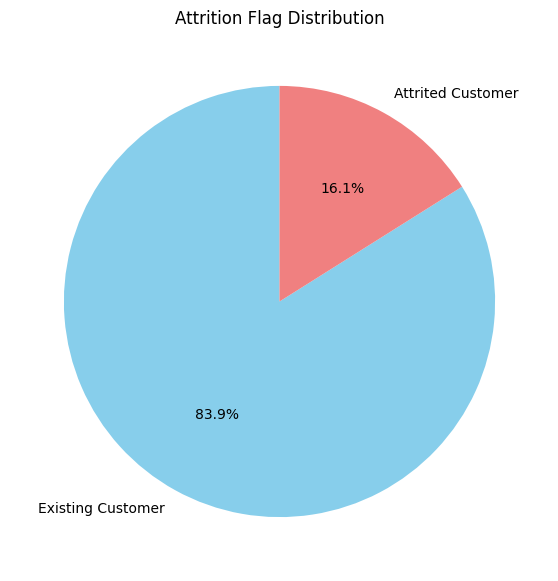

In [ ]:
# Count the occurrences of each class in 'Attrition_Flag'
attrition_counts = data['Attrition_Flag'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Attrition Flag Distribution')
plt.show()

1.6

Training without balancing

Classification Report for Training Data (No Balancing):
                   precision    recall  f1-score   support

Attrited Customer       1.00      1.00      1.00      1134
Existing Customer       1.00      1.00      1.00      5954

         accuracy                           1.00      7088
        macro avg       1.00      1.00      1.00      7088
     weighted avg       1.00      1.00      1.00      7088



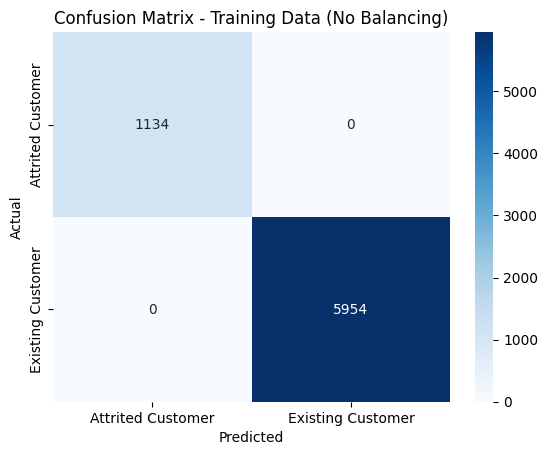

Classification Report for Validation Data (No Balancing):
                   precision    recall  f1-score   support

Attrited Customer       1.00      1.00      1.00       224
Existing Customer       1.00      1.00      1.00      1295

         accuracy                           1.00      1519
        macro avg       1.00      1.00      1.00      1519
     weighted avg       1.00      1.00      1.00      1519



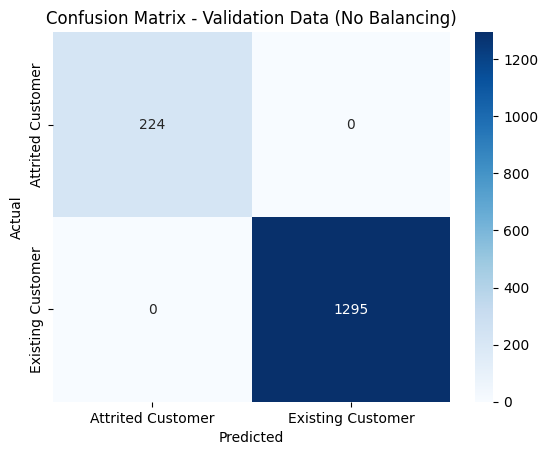

In [ ]:
X = data.drop(columns=['Attrition_Flag'])  # Input features
y = data['Attrition_Flag']  # Output features

#1. Convert categorical features to numeric
label_encoder = LabelEncoder()

# Features that are textual
categorical_columns = ['Gender', 'Education_Level',  'Marital_Status', "Income_Category" , 'Card_Category' , ]

# Convert categorical features with LabelEncoder
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Convert other attributes (like 'Attrition_Flag') with OneHotEncoder
X = pd.get_dummies(X, drop_first=True)  # To prevent duplicate batches

#2. Splitting the data into training, validation, and testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=73)  # 70% training, 30% validation and testing
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=73) # Divide 15% into validation and 15% into testing

# 3. Training the model without data balancing (Random Forest)
model_no_balance = RandomForestClassifier(n_estimators=100, random_state=73)
model_no_balance.fit(X_train, y_train)

# 4. Predict and report model performance without balancing on training and validation data
y_train_pred_no_balance = model_no_balance.predict(X_train)
y_val_pred_no_balance = model_no_balance.predict(X_val)

# Classification report and confusion matrix for training data (without balancing)
print("Classification Report for Training Data (No Balancing):")
print(classification_report(y_train, y_train_pred_no_balance))
conf_matrix_train_no_balance = confusion_matrix(y_train, y_train_pred_no_balance)
sns.heatmap(conf_matrix_train_no_balance, annot=True, fmt="d", cmap="Blues", xticklabels=model_no_balance.classes_, yticklabels=model_no_balance.classes_)
plt.title("Confusion Matrix - Training Data (No Balancing)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report and confusion matrix for validation data (without balancing)
print("Classification Report for Validation Data (No Balancing):")
print(classification_report(y_val, y_val_pred_no_balance))
conf_matrix_val_no_balance = confusion_matrix(y_val, y_val_pred_no_balance)
sns.heatmap(conf_matrix_val_no_balance, annot=True, fmt="d", cmap="Blues", xticklabels=model_no_balance.classes_, yticklabels=model_no_balance.classes_)
plt.title("Confusion Matrix - Validation Data (No Balancing)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Balanced training

Classification Report for Training Data (With Balancing):
                   precision    recall  f1-score   support

Attrited Customer       1.00      1.00      1.00      5954
Existing Customer       1.00      1.00      1.00      5954

         accuracy                           1.00     11908
        macro avg       1.00      1.00      1.00     11908
     weighted avg       1.00      1.00      1.00     11908



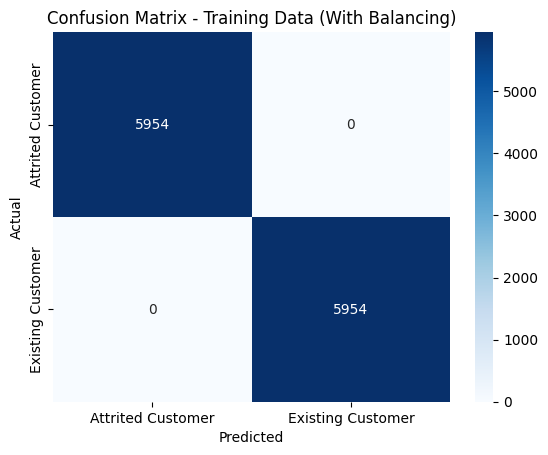

Classification Report for Validation Data (With Balancing):
                   precision    recall  f1-score   support

Attrited Customer       1.00      1.00      1.00       224
Existing Customer       1.00      1.00      1.00      1295

         accuracy                           1.00      1519
        macro avg       1.00      1.00      1.00      1519
     weighted avg       1.00      1.00      1.00      1519



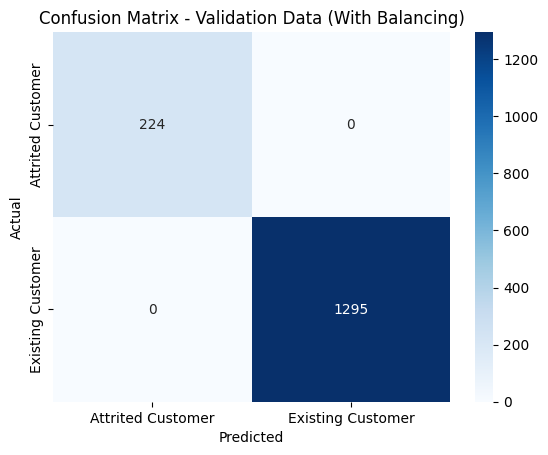

In [ ]:
# 5. Data balancing using SMOTE
smote = SMOTE(random_state=73)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 6. Train the model with balanced data
model_with_balance = RandomForestClassifier(n_estimators=100, random_state=73)
model_with_balance.fit(X_train_res, y_train_res)

# 7. Predict and report model performance by balancing data on training and validation data
y_train_pred_with_balance = model_with_balance.predict(X_train_res)
y_val_pred_with_balance = model_with_balance.predict(X_val)

# Classification report and confusion matrix for training data (balanced)
print("Classification Report for Training Data (With Balancing):")
print(classification_report(y_train_res, y_train_pred_with_balance))
conf_matrix_train_with_balance = confusion_matrix(y_train_res, y_train_pred_with_balance)
sns.heatmap(conf_matrix_train_with_balance, annot=True, fmt="d", cmap="Blues", xticklabels=model_with_balance.classes_, yticklabels=model_with_balance.classes_)
plt.title("Confusion Matrix - Training Data (With Balancing)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report and confusion matrix for validation data (balanced)
print("Classification Report for Validation Data (With Balancing):")
print(classification_report(y_val, y_val_pred_with_balance))
conf_matrix_val_with_balance = confusion_matrix(y_val, y_val_pred_with_balance)
sns.heatmap(conf_matrix_val_with_balance, annot=True, fmt="d", cmap="Blues", xticklabels=model_with_balance.classes_, yticklabels=model_with_balance.classes_)
plt.title("Confusion Matrix - Validation Data (With Balancing)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Adding  class_weight='balanced' to fit the trained model with balanced data

Classification Report for Training Data (With Balancing):
                   precision    recall  f1-score   support

Attrited Customer       1.00      1.00      1.00      5954
Existing Customer       1.00      1.00      1.00      5954

         accuracy                           1.00     11908
        macro avg       1.00      1.00      1.00     11908
     weighted avg       1.00      1.00      1.00     11908



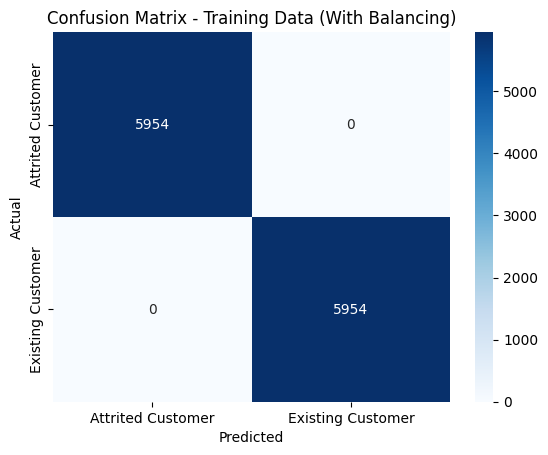

Classification Report for Validation Data (With Balancing):
                   precision    recall  f1-score   support

Attrited Customer       1.00      1.00      1.00       224
Existing Customer       1.00      1.00      1.00      1295

         accuracy                           1.00      1519
        macro avg       1.00      1.00      1.00      1519
     weighted avg       1.00      1.00      1.00      1519



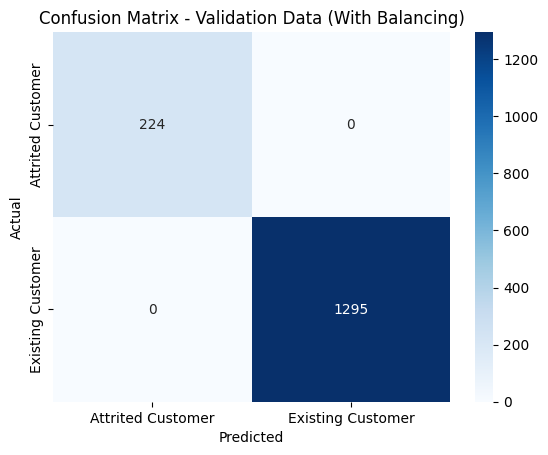

In [ ]:
# 5. Data balancing using SMOTE
smote = SMOTE(random_state=73)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 6. Train the model with balanced data (using class_weight='balanced')
model_with_balance = RandomForestClassifier(n_estimators=30, random_state=73, class_weight='balanced')
model_with_balance.fit(X_train_res, y_train_res)

# 7. Predict and report model performance by balancing data on training and validation data
y_train_pred_with_balance = model_with_balance.predict(X_train_res)
y_val_pred_with_balance = model_with_balance.predict(X_val)

# Classification report and confusion matrix for training data (balanced)
print("Classification Report for Training Data (With Balancing):")
print(classification_report(y_train_res, y_train_pred_with_balance))
conf_matrix_train_with_balance = confusion_matrix(y_train_res, y_train_pred_with_balance)
sns.heatmap(conf_matrix_train_with_balance, annot=True, fmt="d", cmap="Blues", xticklabels=model_with_balance.classes_, yticklabels=model_with_balance.classes_)
plt.title("Confusion Matrix - Training Data (With Balancing)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report and confusion matrix for validation data (balanced)
print("Classification Report for Validation Data (With Balancing):")
print(classification_report(y_val, y_val_pred_with_balance))
conf_matrix_val_with_balance = confusion_matrix(y_val, y_val_pred_with_balance)
sns.heatmap(conf_matrix_val_with_balance, annot=True, fmt="d", cmap="Blues", xticklabels=model_with_balance.classes_, yticklabels=model_with_balance.classes_)
plt.title("Confusion Matrix - Validation Data (With Balancing)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Using cross-validation and limiting model complexity to avoid overfitting

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Score: 1.0
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 1.0
Classification Report for Training Data:
                   precision    recall  f1-score   support

Attrited Customer       1.00      1.00      1.00      1134
Existing Customer       1.00      1.00      1.00      5954

         accuracy                           1.00      7088
        macro avg       1.00      1.00      1.00      7088
     weighted avg       1.00      1.00      1.00      7088

Classification Report for Validation Data:
                   precision    recall  f1-score   support

Attrited Customer       1.00      1.00      1.00       224
Existing Customer       1.00      1.00      1.00      1295

         accuracy                           1.00      1519
        macro avg       1.00      1.00      1.00      1519
     weighted avg       1.00      1.00      1.00      1519



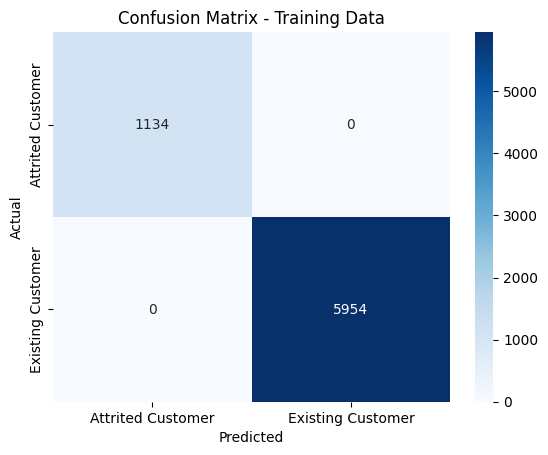

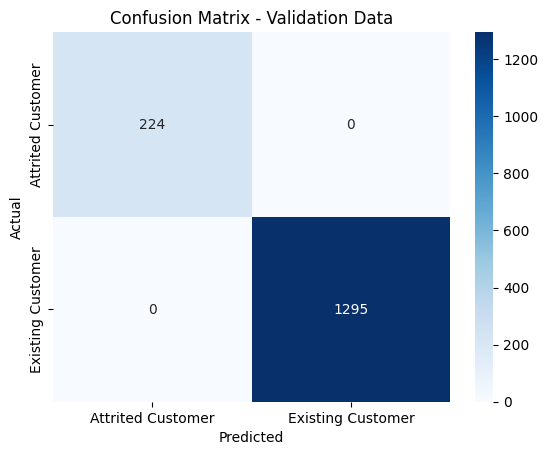

In [ ]:
#1. Model definition by limiting complexity
model = RandomForestClassifier(n_estimators=100, random_state=73, max_depth=10, min_samples_split=10, min_samples_leaf=5)

#2. Using K-Fold Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation

#3. Displaying Cross-Validation Results
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean()}')

# 4. GridSearchCV to find the best parameters (if more fine-tuning is needed)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=73), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Show best GridSearch results
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

#5. Train the model with the best parameters from GridSearch
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# 6. Model prediction and evaluation
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)

# Model report based on training and validation data
from sklearn.metrics import classification_report, confusion_matrix

# Training Data
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred))

# Validation Data
print("Classification Report for Validation Data:")
print(classification_report(y_val, y_val_pred))

# رسم Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Training Data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Confusion Matrix - Training Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion Matrix for Validation Data
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
sns.heatmap(conf_matrix_val, annot=True, fmt="d", cmap="Blues", xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Confusion Matrix - Validation Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Bonus

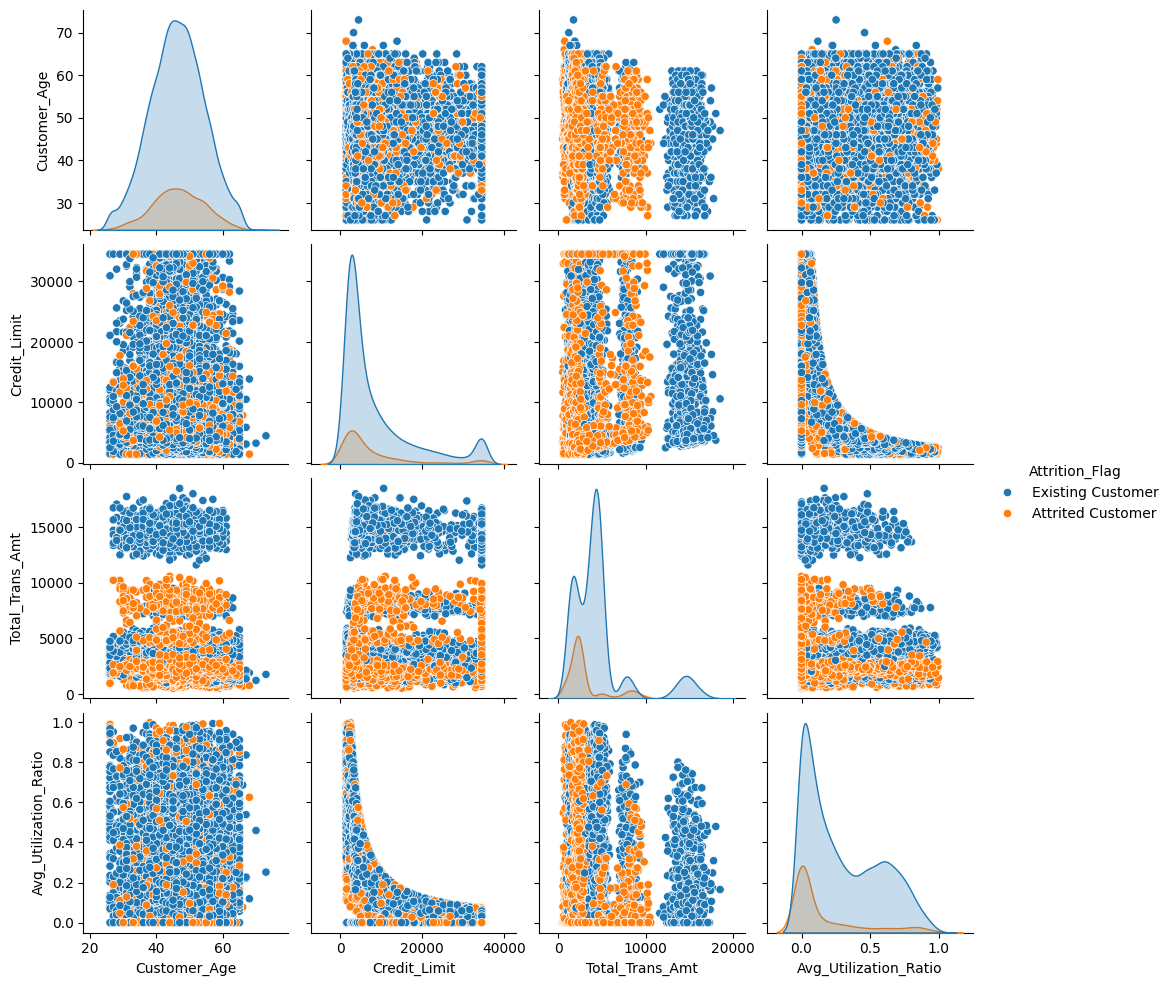

In [ ]:
# Select features to display
selected_features = ['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']

# Draw pairplot with respect to Attrition_Flag class
sns.pairplot(data[selected_features + ['Attrition_Flag']], hue='Attrition_Flag', diag_kind='kde', markers='o')

# Show chart
plt.show()


Q2

In [ ]:
# Read the npy file
data2 = np.load('data.npy')
print(data2)

[ 40.25196507  39.53010126  37.7992167   37.32837052  28.65394346
  29.69747547  26.10881978  27.83802602  22.99054421  25.80112967
  21.29795526  19.91155621  14.96131425  11.47430672  16.95134087
  13.78849326   9.82605161   6.51423783   7.28107882   4.71364215
   0.82726539   2.0547798    1.75589251   4.69110905  -3.1080814
   6.5508178    9.30439077  -5.9567694    2.87594962   3.1993877
  -2.70786354   2.15378132  -1.77644948  -5.11557224  -4.43062279
   6.25451526   1.9854139    7.74342429  -0.75124188   4.43658355
   2.96815869   1.56463746   0.77572103   6.78279848  -0.71535178
   2.83930294   0.35701732 -14.02823175   2.74610814  -8.92342079
  -5.25805964  -5.91984033 -11.23785323 -11.91938329  -4.2483209
  -0.19964379  -9.63227683 -13.30314598 -13.12628213  -7.21216734
  -6.38891745  -0.4667489   -8.21628152  -3.07657489 -19.52390961
  -9.6384843    4.01358254  -0.04798927   6.13528941   0.47146013
   2.08633153  10.53650805   0.19410599  -1.47248443  12.94164738
   9.22295082

In [ ]:
print(data2.shape)
print("Mean:", np.mean(data2))
print("Standard Deviation:", np.std(data2))
print("Min:", np.min(data2))
print("Max:", np.max(data2))



(100,)
Mean: 6.318082393530108
Standard Deviation: 12.032918191230813
Min: -19.523909610590692
Max: 40.25196507277925


Generating the X function

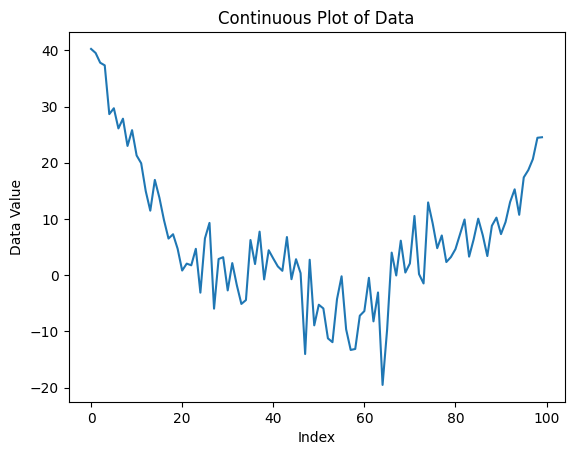

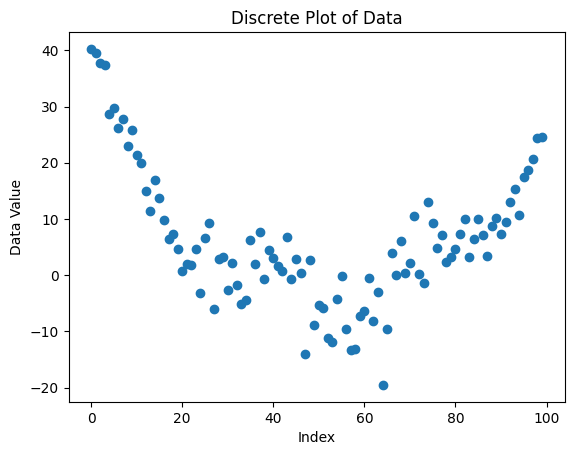

In [ ]:
data2 = np.array([40.25196507, 39.53010126, 37.7992167, 37.32837052, 28.65394346,
                 29.69747547, 26.10881978, 27.83802602, 22.99054421, 25.80112967,
                 21.29795526, 19.91155621, 14.96131425, 11.47430672, 16.95134087,
                 13.78849326, 9.82605161, 6.51423783, 7.28107882, 4.71364215,
                 0.82726539, 2.0547798, 1.75589251, 4.69110905, -3.1080814,
                 6.5508178, 9.30439077, -5.9567694, 2.87594962, 3.1993877,
                 -2.70786354, 2.15378132, -1.77644948, -5.11557224, -4.43062279,
                 6.25451526, 1.9854139, 7.74342429, -0.75124188, 4.43658355,
                 2.96815869, 1.56463746, 0.77572103, 6.78279848, -0.71535178,
                 2.83930294, 0.35701732, -14.02823175, 2.74610814, -8.92342079,
                 -5.25805964, -5.91984033, -11.23785323, -11.91938329, -4.2483209,
                 -0.19964379, -9.63227683, -13.30314598, -13.12628213, -7.21216734,
                 -6.38891745, -0.4667489, -8.21628152, -3.07657489, -19.52390961,
                 -9.6384843, 4.01358254, -0.04798927, 6.13528941, 0.47146013,
                 2.08633153, 10.53650805, 0.19410599, -1.47248443, 12.94164738,
                 9.22295082, 4.8044539, 7.06519393, 2.33812888, 3.21795311,
                 4.63512252, 7.27235385, 9.90686345, 3.29586551, 6.37295172,
                 10.05409648, 7.09980433, 3.40197508, 8.79312464, 10.23818681,
                 7.30636817, 9.45267898, 13.01264151, 15.27407037, 10.74387524,
                 17.39972088, 18.69963466, 20.65273966, 24.44557776, 24.53832675])
# Using linspace to generate the array x
x2 = np.linspace(0, len(data2)-1, len(data2))

# Draw a continuous graph
plt.plot(x2, data2)
plt.xlabel('Index')
plt.ylabel('Data Value')
plt.title('Continuous Plot of Data')
plt.show()

# Draw a discrete graph
plt.scatter(x2, data2)
plt.xlabel('Index')
plt.ylabel('Data Value')
plt.title('Discrete Plot of Data')
plt.show()


2.1

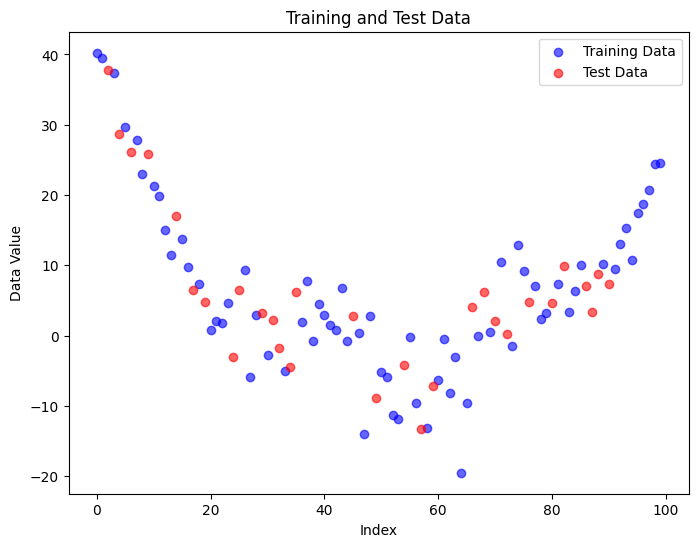

In [ ]:
# آرایه x برای ایجاد نقاط
x2 = np.linspace(0, len(data2)-1, len(data2))

# تقسیم داده‌ها و x به مجموعه‌های آموزشی و آزمون
x2_train, x2_test, X2_train, X2_test = train_test_split(x2, data2, test_size=0.3, random_state=73)

# رسم نمودار روی یک محور
plt.figure(figsize=(8, 6))

# داده‌های آموزشی (آبی)
plt.scatter(x2_train, X2_train, color='blue', label='Training Data', alpha=0.6)

# داده‌های آزمون (قرمز)
plt.scatter(x2_test, X2_test, color='red', label='Test Data', alpha=0.6)

# تنظیمات نمودار
plt.xlabel('Index')
plt.ylabel('Data Value')
plt.title('Training and Test Data')
plt.legend()

# نمایش نمودار
plt.show()

2.2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


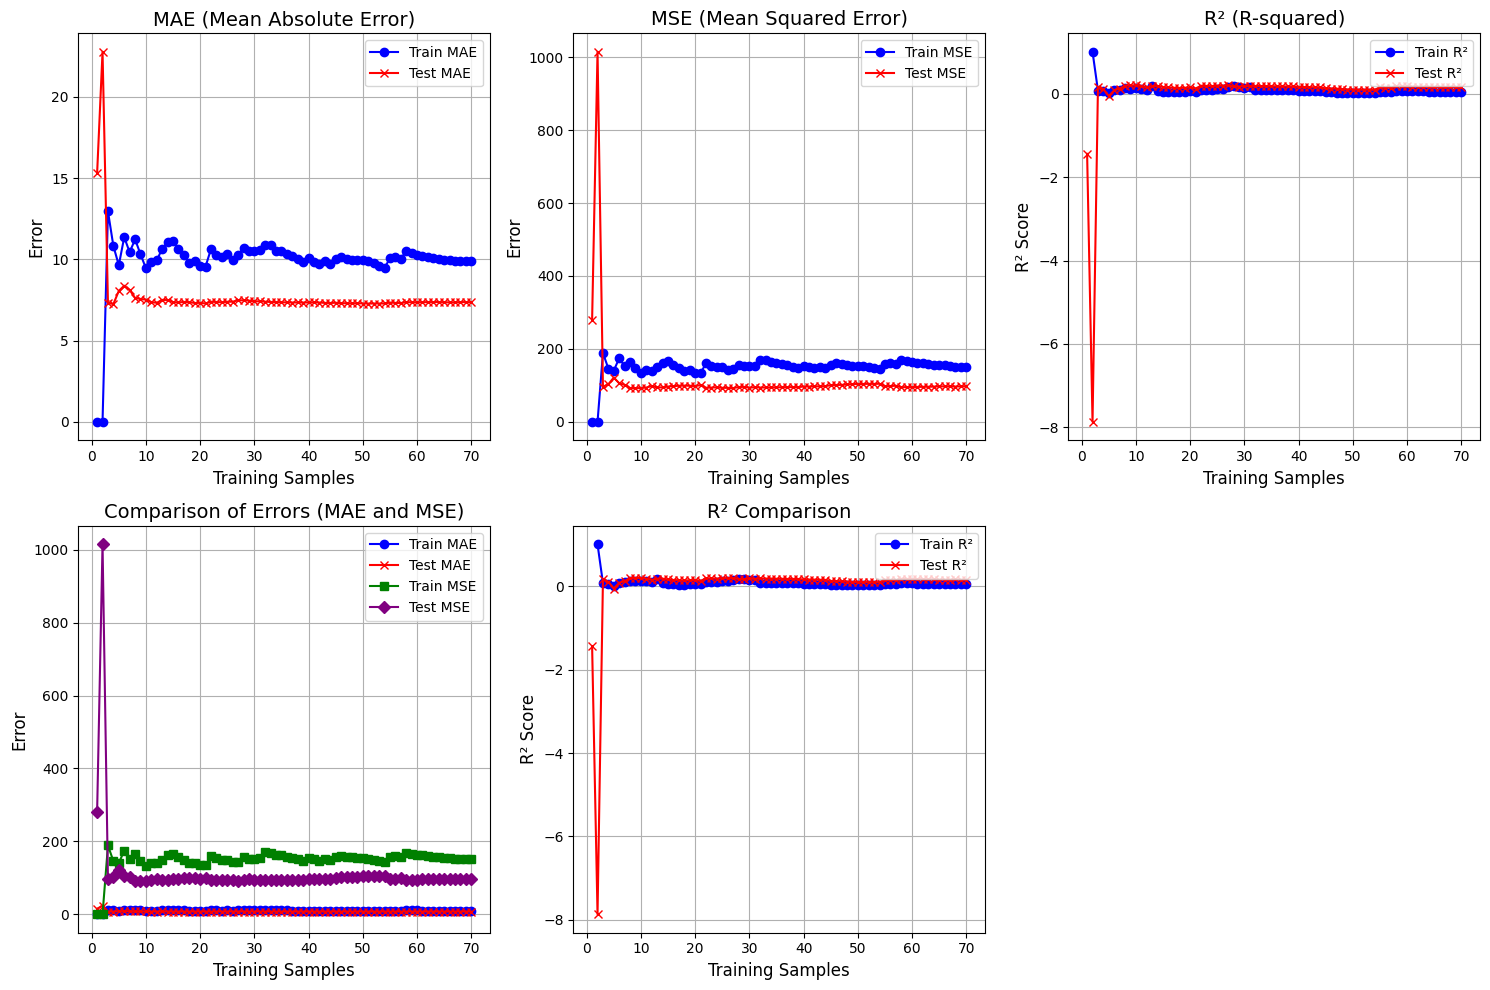

In [ ]:
# ایجاد مدل رگرسیون خطی
model = LinearRegression()

# لیست برای ذخیره خطاها
train_errors = []
test_errors = []

# آموزش مدل و محاسبه خطا در هر مرحله
for i in range(1, len(x_train)+1):
    model.fit(x_train[:i].reshape(-1, 1), y_train[:i])  # آموزش مدل
    y_train_pred = model.predict(x_train[:i].reshape(-1, 1))  # پیش‌بینی داده‌های آموزش
    y_test_pred = model.predict(x_test.reshape(-1, 1))  # پیش‌بینی داده‌های آزمون

    # محاسبه خطاها
    train_mae = mean_absolute_error(y_train[:i], y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    train_mse = mean_squared_error(y_train[:i], y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_r2 = r2_score(y_train[:i], y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # ذخیره خطاها
    train_errors.append([train_mae, train_mse, train_r2])
    test_errors.append([test_mae, test_mse, test_r2])

# تبدیل خطاها به آرایه numpy برای ترسیم نمودار
train_errors = np.array(train_errors)
test_errors = np.array(test_errors)

# ترسیم نمودار خطا
plt.figure(figsize=(15, 10))

# MAE (Mean Absolute Error)
plt.subplot(2, 3, 1)
plt.plot(range(1, len(x_train)+1), train_errors[:, 0], label='Train MAE', color='blue', linestyle='-', marker='o')
plt.plot(range(1, len(x_train)+1), test_errors[:, 0], label='Test MAE', color='red', linestyle='-', marker='x')
plt.title('MAE (Mean Absolute Error)', fontsize=14)
plt.xlabel('Training Samples', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.legend()
plt.grid(True)

# MSE (Mean Squared Error)
plt.subplot(2, 3, 2)
plt.plot(range(1, len(x_train)+1), train_errors[:, 1], label='Train MSE', color='blue', linestyle='-', marker='o')
plt.plot(range(1, len(x_train)+1), test_errors[:, 1], label='Test MSE', color='red', linestyle='-', marker='x')
plt.title('MSE (Mean Squared Error)', fontsize=14)
plt.xlabel('Training Samples', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.legend()
plt.grid(True)

# R² (R-squared)
plt.subplot(2, 3, 3)
plt.plot(range(1, len(x_train)+1), train_errors[:, 2], label='Train R²', color='blue', linestyle='-', marker='o')
plt.plot(range(1, len(x_train)+1), test_errors[:, 2], label='Test R²', color='red', linestyle='-', marker='x')
plt.title('R² (R-squared)', fontsize=14)
plt.xlabel('Training Samples', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.legend()
plt.grid(True)

# ترسیم نمودار خطاها در یک نمودار بزرگ‌تر
plt.subplot(2, 3, 4)
plt.plot(range(1, len(x_train)+1), train_errors[:, 0], label='Train MAE', color='blue', linestyle='-', marker='o')
plt.plot(range(1, len(x_train)+1), test_errors[:, 0], label='Test MAE', color='red', linestyle='-', marker='x')
plt.plot(range(1, len(x_train)+1), train_errors[:, 1], label='Train MSE', color='green', linestyle='-', marker='s')
plt.plot(range(1, len(x_train)+1), test_errors[:, 1], label='Test MSE', color='purple', linestyle='-', marker='D')
plt.title('Comparison of Errors (MAE and MSE)', fontsize=14)
plt.xlabel('Training Samples', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.legend()
plt.grid(True)

# ترسیم نمودار R² برای آموزش و آزمون
plt.subplot(2, 3, 5)
plt.plot(range(1, len(x_train)+1), train_errors[:, 2], label='Train R²', color='blue', linestyle='-', marker='o')
plt.plot(range(1, len(x_train)+1), test_errors[:, 2], label='Test R²', color='red', linestyle='-', marker='x')
plt.title('R² Comparison', fontsize=14)
plt.xlabel('Training Samples', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

2.3

پارامتر مدل:
β0 (عرض از مبدا): 10.4804
β1 (شیب خط): -0.0883

خطای MAE برای داده‌های آموزش: 9.9109
خطای MAE برای داده‌های آزمون: 7.3535
خطای MSE برای داده‌های آموزش: 150.8923
خطای MSE برای داده‌های آزمون: 97.4421
R² برای داده‌های آموزش: 0.0415
R² برای داده‌های آزمون: 0.1574


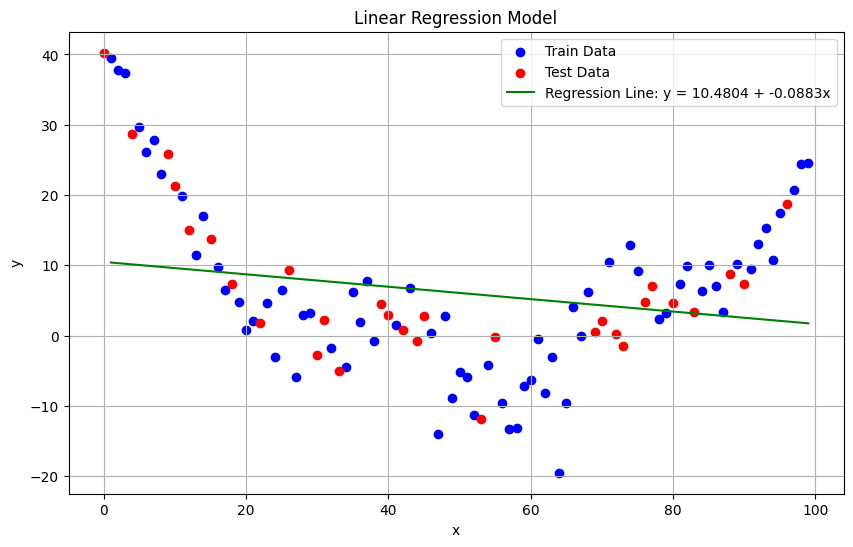

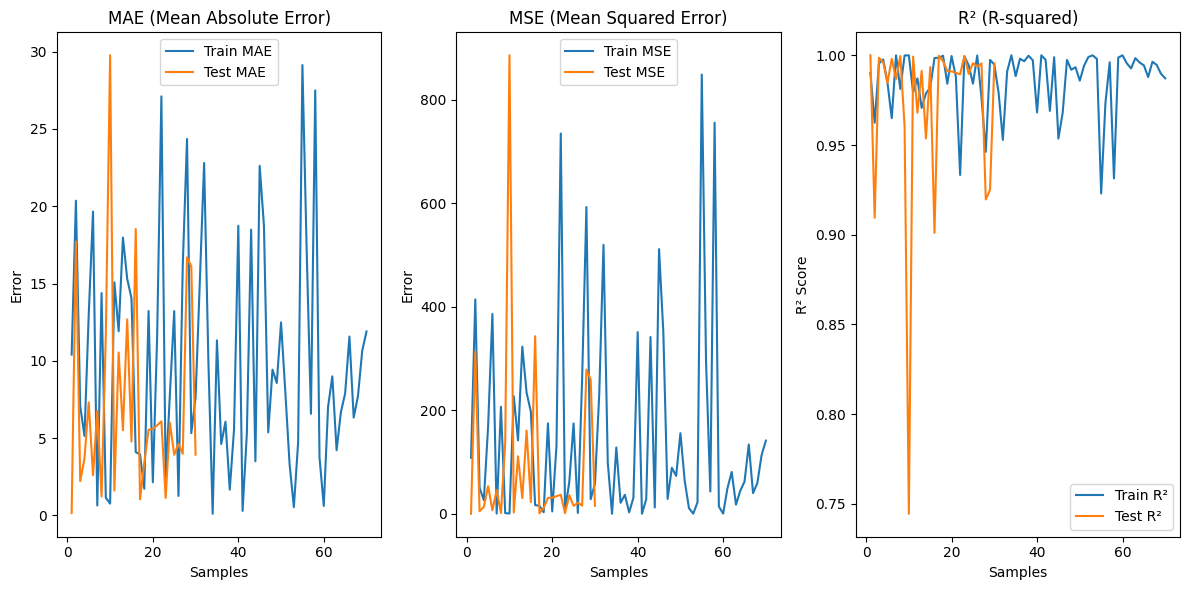

In [ ]:
# محاسبه میانگین داده‌ها
x_mean = np.mean(x_train)
y_mean = np.mean(y_train)

# محاسبه ضرایب رگرسیون خطی درجه اول (β0, β1)
beta1 = np.sum((x_train - x_mean) * (y_train - y_mean)) / np.sum((x_train - x_mean)**2)
beta0 = y_mean - beta1 * x_mean

# پیش‌بینی‌ها
y_train_pred = beta0 + beta1 * x_train
y_test_pred = beta0 + beta1 * x_test

# محاسبه خطاها برای داده‌های آموزش و آزمون
train_mae = np.mean(np.abs(y_train - y_train_pred))
test_mae = np.mean(np.abs(y_test - y_test_pred))

train_mse = np.mean((y_train - y_train_pred)**2)
test_mse = np.mean((y_test - y_test_pred)**2)

train_r2 = 1 - np.sum((y_train - y_train_pred)**2) / np.sum((y_train - y_mean)**2)
test_r2 = 1 - np.sum((y_test - y_test_pred)**2) / np.sum((y_test - y_mean)**2)

# نمایش ضرایب پارامتر
print(f"پارامتر مدل:")
print(f"β0 (عرض از مبدا): {beta0:.4f}")
print(f"β1 (شیب خط): {beta1:.4f}")
print(f"\nخطای MAE برای داده‌های آموزش: {train_mae:.4f}")
print(f"خطای MAE برای داده‌های آزمون: {test_mae:.4f}")
print(f"خطای MSE برای داده‌های آموزش: {train_mse:.4f}")
print(f"خطای MSE برای داده‌های آزمون: {test_mse:.4f}")
print(f"R² برای داده‌های آموزش: {train_r2:.4f}")
print(f"R² برای داده‌های آزمون: {test_r2:.4f}")

# ترسیم داده‌ها و خط مدل
plt.figure(figsize=(10, 6))

# داده‌های آموزش و پیش‌بینی‌ها
plt.scatter(x_train, y_train, color='blue', label='Train Data')
plt.scatter(x_test, y_test, color='red', label='Test Data')

# خط رگرسیون
x_line = np.linspace(min(x_train), max(x_train), 100)  # برای رسم خط رگرسیون
y_line = beta0 + beta1 * x_line
plt.plot(x_line, y_line, color='green', label=f'Regression Line: y = {beta0:.4f} + {beta1:.4f}x')

# اضافه کردن عنوان و برچسب‌ها
plt.title('Linear Regression Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# ترسیم نمودار خطا
plt.figure(figsize=(12, 6))

# MAE
plt.subplot(1, 3, 1)
plt.plot(range(1, len(x_train)+1), np.abs(y_train - y_train_pred), label='Train MAE')
plt.plot(range(1, len(x_test)+1), np.abs(y_test - y_test_pred), label='Test MAE')
plt.title('MAE (Mean Absolute Error)')
plt.xlabel('Samples')
plt.ylabel('Error')
plt.legend()

# MSE
plt.subplot(1, 3, 2)
plt.plot(range(1, len(x_train)+1), (y_train - y_train_pred)**2, label='Train MSE')
plt.plot(range(1, len(x_test)+1), (y_test - y_test_pred)**2, label='Test MSE')
plt.title('MSE (Mean Squared Error)')
plt.xlabel('Samples')
plt.ylabel('Error')
plt.legend()

# R²
plt.subplot(1, 3, 3)
plt.plot(range(1, len(x_train)+1), 1 - (y_train - y_train_pred)**2 / np.sum((y_train - y_mean)**2), label='Train R²')
plt.plot(range(1, len(x_test)+1), 1 - (y_test - y_test_pred)**2 / np.sum((y_test - y_mean)**2), label='Test R²')
plt.title('R² (R-squared)')
plt.xlabel('Samples')
plt.ylabel('R² Score')
plt.legend()

plt.tight_layout()
plt.show()

2.4

<ipython-input-111-4644e3d6df48>:18: RuntimeWarning: invalid value encountered in scalar divide
  beta1 = np.sum((x_train_i - x_mean) * (y_train_i - y_mean)) / np.sum((x_train_i - x_mean)**2)


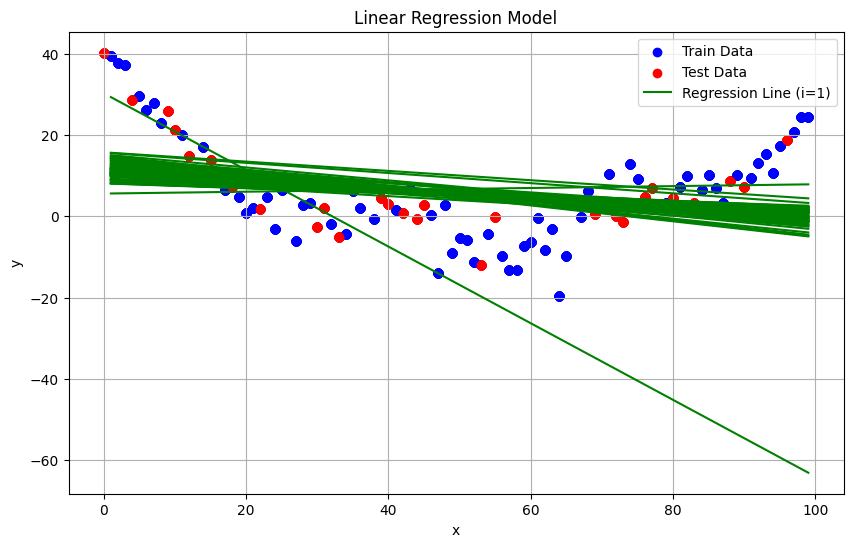

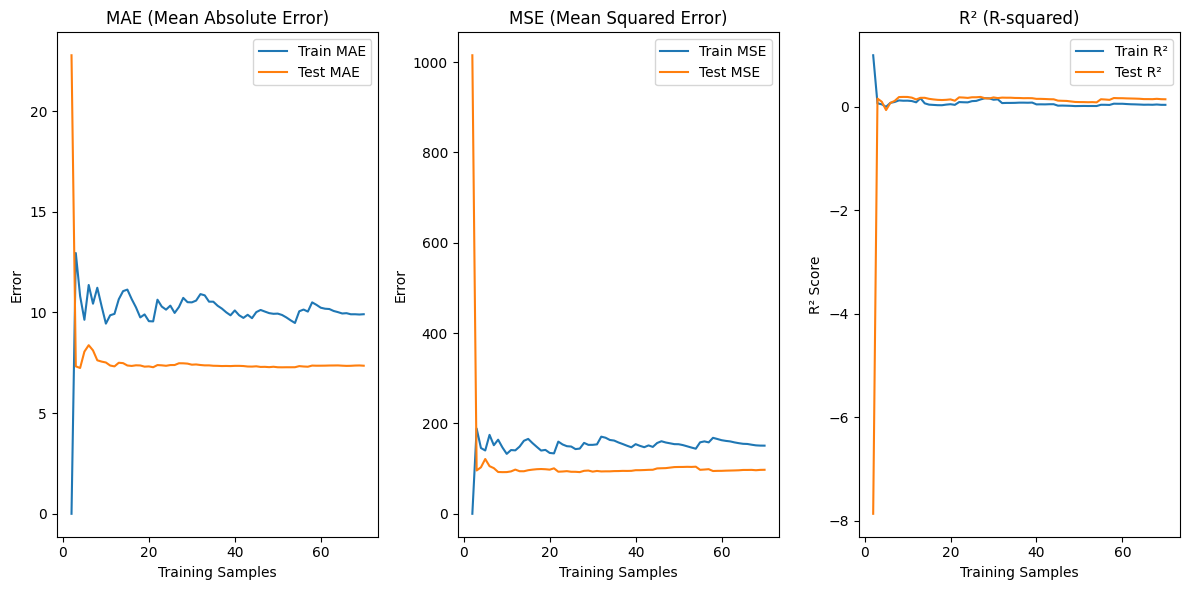

In [ ]:
# لیست برای ذخیره خطاها
train_errors = []
test_errors = []

# ترسیم داده‌ها و خط مدل در هر مرحله
plt.figure(figsize=(10, 6))

for i in range(1, len(x_train) + 1):
    # آموزش مدل با i داده
    x_train_i = x_train[:i]
    y_train_i = y_train[:i]

    # محاسبه میانگین داده‌ها
    x_mean = np.mean(x_train_i)
    y_mean = np.mean(y_train_i)

    # محاسبه ضرایب رگرسیون خطی درجه اول (β0, β1)
    beta1 = np.sum((x_train_i - x_mean) * (y_train_i - y_mean)) / np.sum((x_train_i - x_mean)**2)
    beta0 = y_mean - beta1 * x_mean

    # پیش‌بینی‌ها
    y_train_pred = beta0 + beta1 * x_train_i
    y_test_pred = beta0 + beta1 * x_test

    # محاسبه خطاها
    train_mae = np.mean(np.abs(y_train_i - y_train_pred))
    test_mae = np.mean(np.abs(y_test - y_test_pred))

    train_mse = np.mean((y_train_i - y_train_pred)**2)
    test_mse = np.mean((y_test - y_test_pred)**2)

    train_r2 = 1 - np.sum((y_train_i - y_train_pred)**2) / np.sum((y_train_i - y_mean)**2)
    test_r2 = 1 - np.sum((y_test - y_test_pred)**2) / np.sum((y_test - np.mean(y_test))**2)

    # ذخیره خطاها
    train_errors.append([train_mae, train_mse, train_r2])
    test_errors.append([test_mae, test_mse, test_r2])

    # ترسیم داده‌ها و پیش‌بینی‌ها
    plt.scatter(x_train, y_train, color='blue', label='Train Data' if i == 1 else "")
    plt.scatter(x_test, y_test, color='red', label='Test Data' if i == 1 else "")

    # ترسیم خط رگرسیون
    x_line = np.linspace(min(x_train), max(x_train), 100)
    y_line = beta0 + beta1 * x_line
    plt.plot(x_line, y_line, color='green', label=f'Regression Line (i={i})' if i == 1 else "")

plt.title('Linear Regression Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# تبدیل خطاها به آرایه numpy برای ترسیم نمودار
train_errors = np.array(train_errors)
test_errors = np.array(test_errors)

# ترسیم نمودار خطا
plt.figure(figsize=(12, 6))

# MAE
plt.subplot(1, 3, 1)
plt.plot(range(1, len(x_train) + 1), train_errors[:, 0], label='Train MAE')
plt.plot(range(1, len(x_train) + 1), test_errors[:, 0], label='Test MAE')
plt.title('MAE (Mean Absolute Error)')
plt.xlabel('Training Samples')
plt.ylabel('Error')
plt.legend()

# MSE
plt.subplot(1, 3, 2)
plt.plot(range(1, len(x_train) + 1), train_errors[:, 1], label='Train MSE')
plt.plot(range(1, len(x_train) + 1), test_errors[:, 1], label='Test MSE')
plt.title('MSE (Mean Squared Error)')
plt.xlabel('Training Samples')
plt.ylabel('Error')
plt.legend()

# R²
plt.subplot(1, 3, 3)
plt.plot(range(1, len(x_train) + 1), train_errors[:, 2], label='Train R²')
plt.plot(range(1, len(x_train) + 1), test_errors[:, 2], label='Test R²')
plt.title('R² (R-squared)')
plt.xlabel('Training Samples')
plt.ylabel('R² Score')
plt.legend()

plt.tight_layout()
plt.show()

2.6

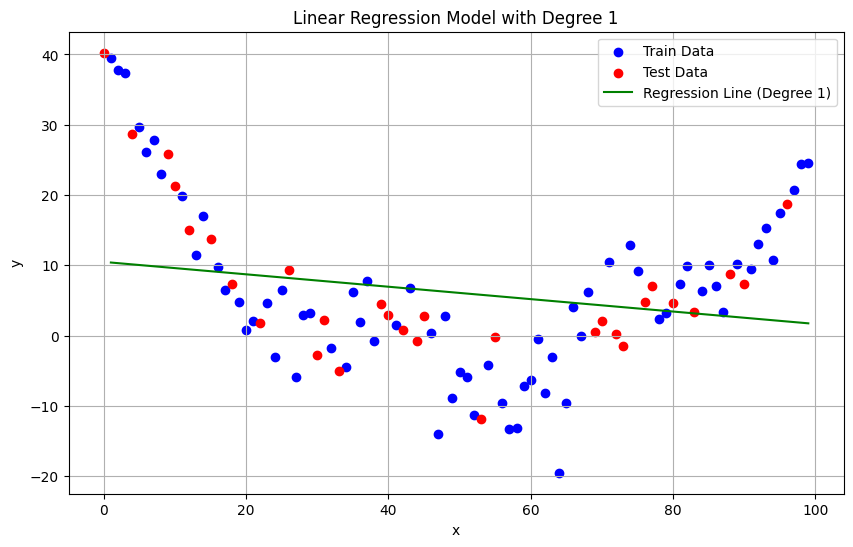

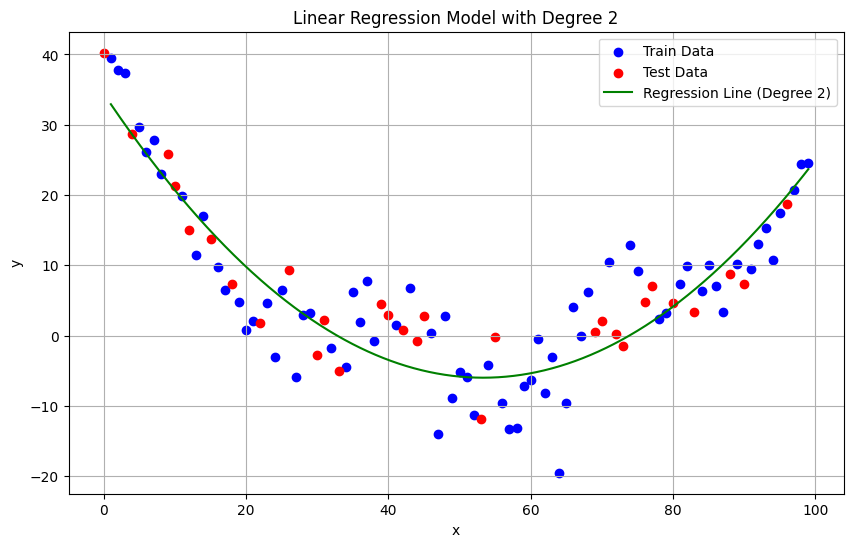

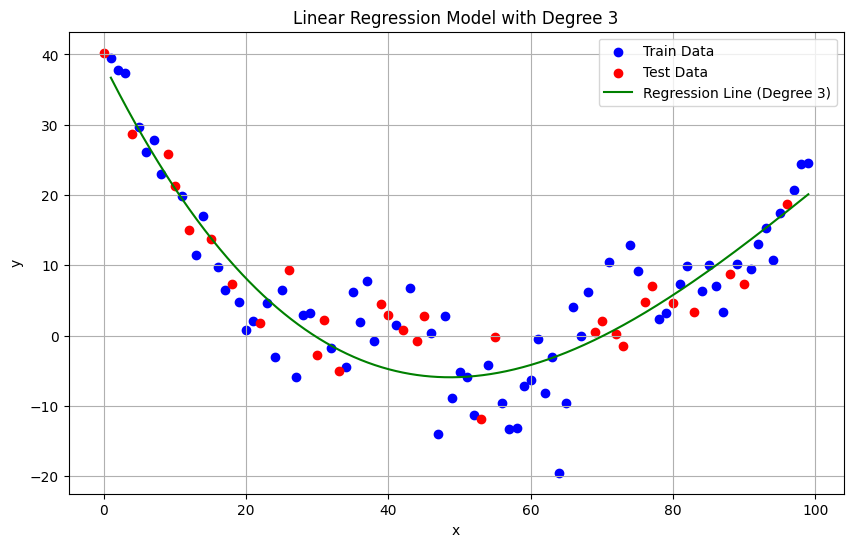

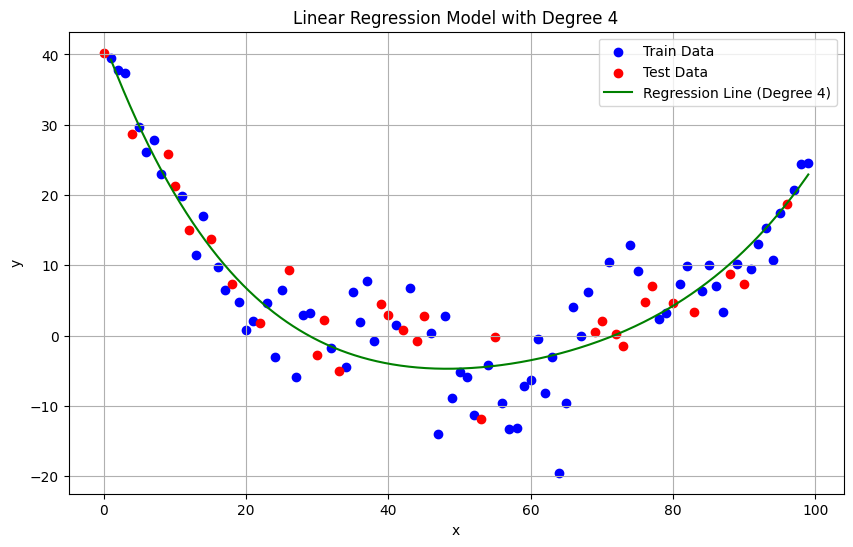

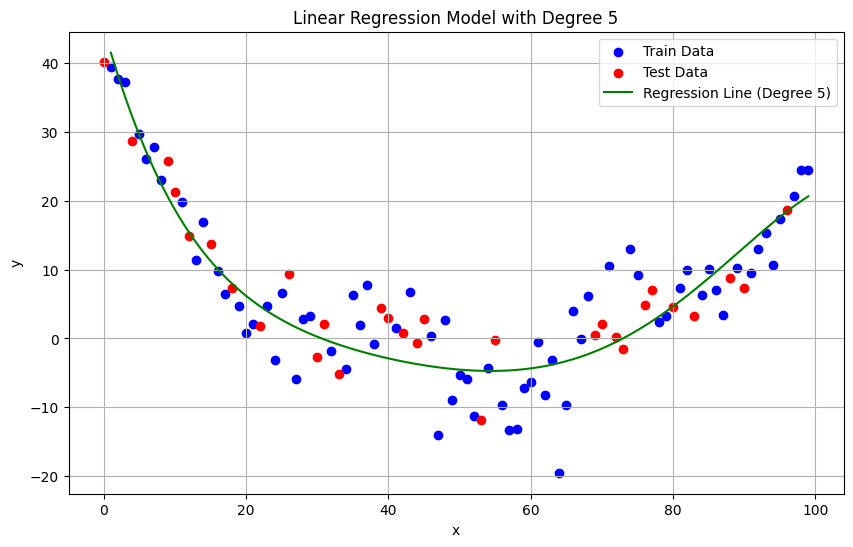

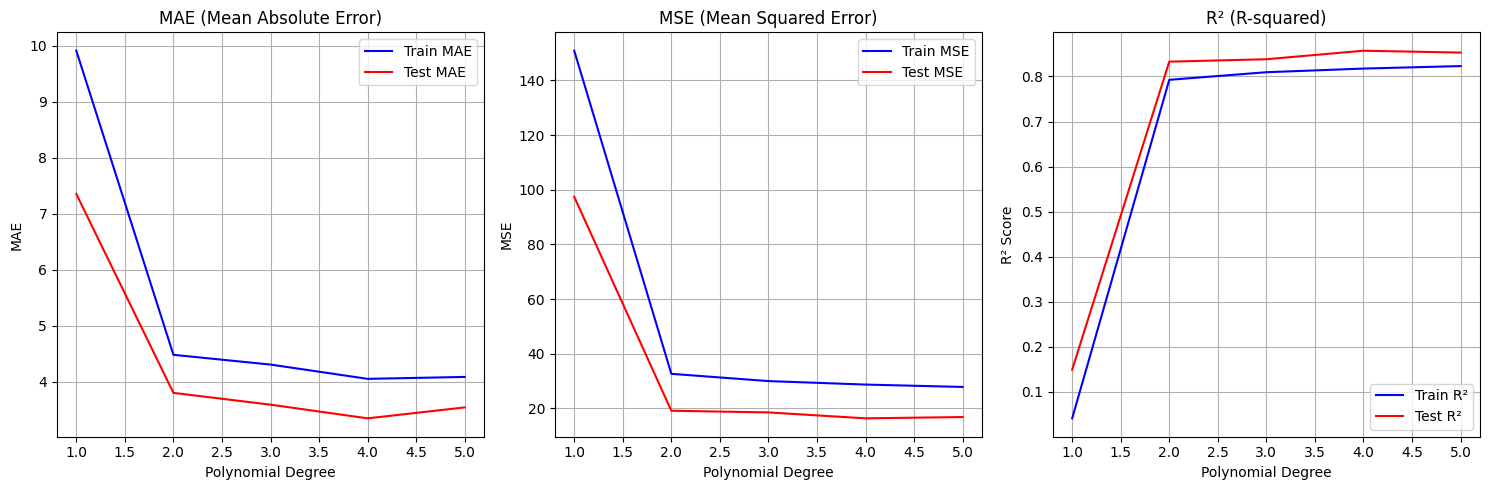

In [ ]:
# تابع برای ساخت ویژگی‌های چندجمله‌ای
def polynomial_features(x, degree):
    return np.array([x**i for i in range(degree + 1)]).T

# مقادیر اولیه برای ذخیره نتایج
train_mae = []
test_mae = []
train_mse = []
test_mse = []
train_r2 = []
test_r2 = []

# آموزش مدل برای درجات مختلف
for degree in range(1, 6):  # از درجه 1 تا 5
    # ساخت ویژگی‌های چندجمله‌ای
    X_train_poly = polynomial_features(x_train, degree)
    X_test_poly = polynomial_features(x_test, degree)

    # محاسبه ضرایب رگرسیون (با استفاده از روش معمولی حداقل مربعات)
    beta = np.linalg.inv(X_train_poly.T @ X_train_poly) @ X_train_poly.T @ y_train

    # پیش‌بینی‌ها
    y_train_pred = X_train_poly @ beta
    y_test_pred = X_test_poly @ beta

    # محاسبه خطاها
    train_mae.append(mean_absolute_error(y_train, y_train_pred))  # MAE برای داده‌های آموزش
    test_mae.append(mean_absolute_error(y_test, y_test_pred))  # MAE برای داده‌های آزمون
    train_mse.append(mean_squared_error(y_train, y_train_pred))  # MSE برای داده‌های آموزش
    test_mse.append(mean_squared_error(y_test, y_test_pred))  # MSE برای داده‌های آزمون
    train_r2.append(r2_score(y_train, y_train_pred))  # R² برای داده‌های آموزش
    test_r2.append(r2_score(y_test, y_test_pred))  # R² برای داده‌های آزمون

    # ترسیم داده‌ها و مرز جدایی
    plt.figure(figsize=(10, 6))

    # رسم داده‌های آموزشی و آزمون
    plt.scatter(x_train, y_train, color='blue', label='Train Data')
    plt.scatter(x_test, y_test, color='red', label='Test Data')

    # ایجاد مرز جدایی برای مدل
    x_line = np.linspace(min(x_train), max(x_train), 1000)  # نقاط برای رسم مرز
    X_line_poly = polynomial_features(x_line, degree)  # تبدیل به ویژگی‌های چندجمله‌ای
    y_line = X_line_poly @ beta  # پیش‌بینی‌های مدل برای این نقاط

    # رسم مرز جدایی
    plt.plot(x_line, y_line, color='green', label=f'Regression Line (Degree {degree})')

    # اضافه کردن عنوان و برچسب‌ها
    plt.title(f'Linear Regression Model with Degree {degree}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

# MAE
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(range(1, 6), train_mae, label="Train MAE", color='blue')
plt.plot(range(1, 6), test_mae, label="Test MAE", color='red')
plt.title('MAE (Mean Absolute Error)')
plt.xlabel('Polynomial Degree')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

# MSE
plt.subplot(1, 3, 2)
plt.plot(range(1, 6), train_mse, label="Train MSE", color='blue')
plt.plot(range(1, 6), test_mse, label="Test MSE", color='red')
plt.title('MSE (Mean Squared Error)')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

# R²
plt.subplot(1, 3, 3)
plt.plot(range(1, 6), train_r2, label="Train R²", color='blue')
plt.plot(range(1, 6), test_r2, label="Test R²", color='red')
plt.title('R² (R-squared)')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

2.7


MAE:
Linear Regression: Train = 6.5112, Test = 31.2700
Ridge Regression: Train = 6.5112, Test = 31.2690
Lasso Regression: Train = 6.5110, Test = 31.2577

MSE:
Linear Regression: Train = 65.1966, Test = 1088.2164
Ridge Regression: Train = 65.1966, Test = 1088.1546
Lasso Regression: Train = 65.1966, Test = 1087.4099

R²:
Linear Regression: Train = 0.6426, Test = -24.3474
Ridge Regression: Train = 0.6426, Test = -24.3460
Lasso Regression: Train = 0.6426, Test = -24.3286


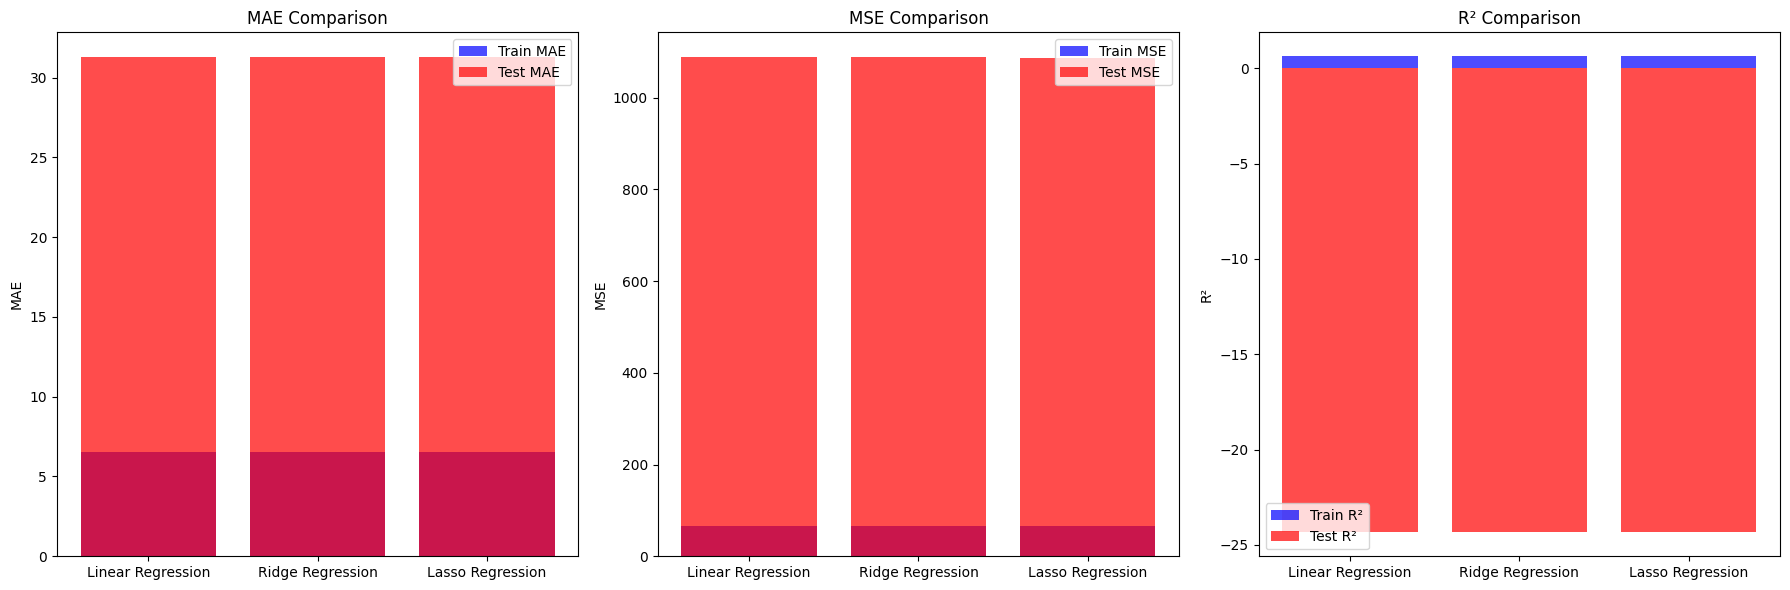

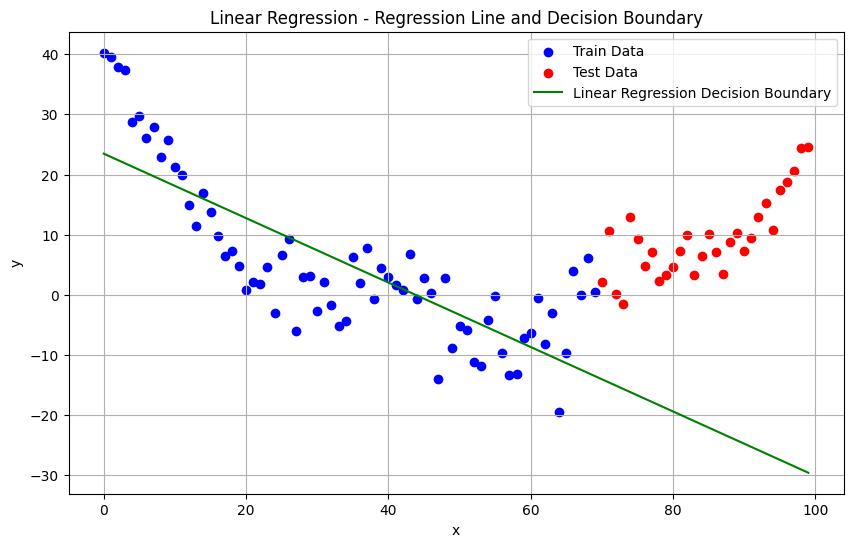

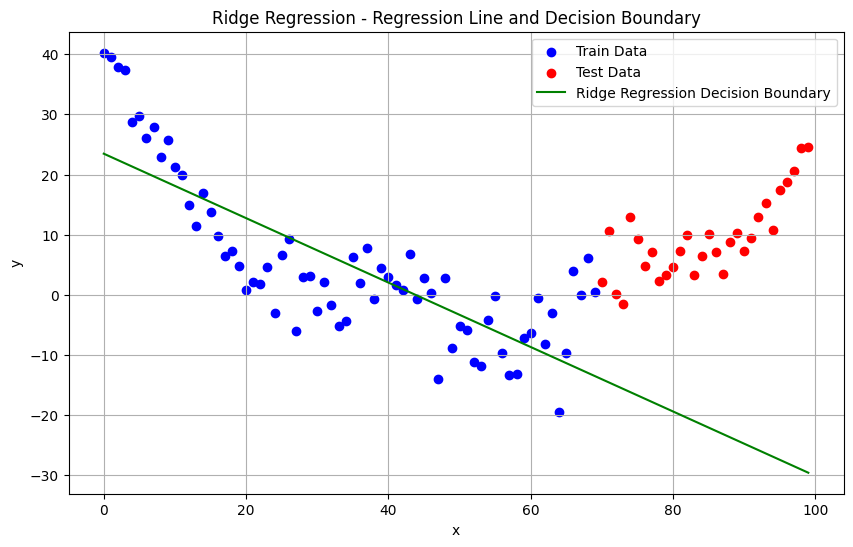

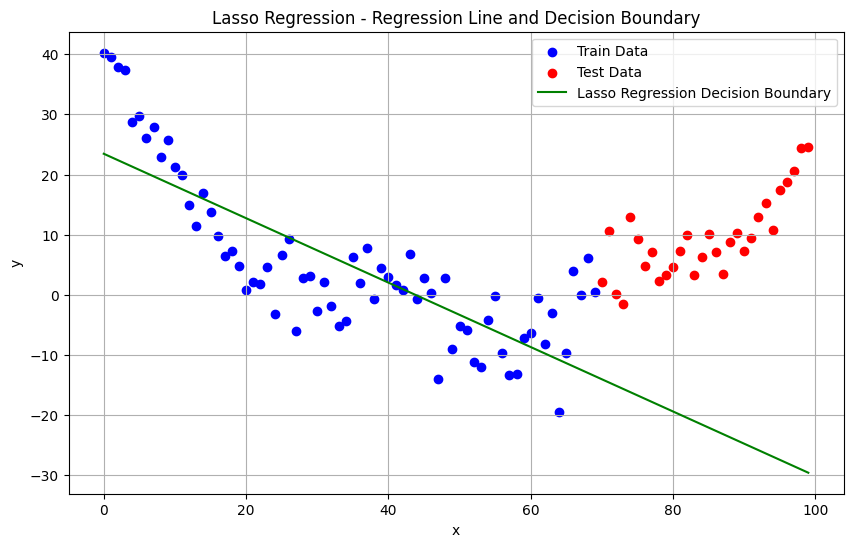

In [ ]:
# داده‌ها
x = np.linspace(0, len(data2)-1, len(data2))
y = data2

# تقسیم داده‌ها به آموزش و تست
train_size = int(0.7 * len(data2))
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# مدل‌های مختلف
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1),
    "Lasso Regression": Lasso(alpha=0.1)
}

# نتایج
results = {"Model": [], "MAE": [], "MSE": [], "R²": []}

# آموزش و ارزیابی هر مدل
for model_name, model in models.items():
    model.fit(x_train.reshape(-1, 1), y_train)
    y_train_pred = model.predict(x_train.reshape(-1, 1))
    y_test_pred = model.predict(x_test.reshape(-1, 1))

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # ذخیره نتایج
    results["Model"].append(model_name)
    results["MAE"].append((mae_train, mae_test))
    results["MSE"].append((mse_train, mse_test))
    results["R²"].append((r2_train, r2_test))

# نمایش نتایج
for metric in ["MAE", "MSE", "R²"]:
    print(f"\n{metric}:")
    for i, model_name in enumerate(results["Model"]):
        print(f"{model_name}: Train = {results[metric][i][0]:.4f}, Test = {results[metric][i][1]:.4f}")

# ترسیم نمودارها برای سه معیار
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# MAE
axs[0].bar(results["Model"], [x[0] for x in results["MAE"]], label="Train MAE", alpha=0.7, color='blue')
axs[0].bar(results["Model"], [x[1] for x in results["MAE"]], label="Test MAE", alpha=0.7, color='red')
axs[0].set_title('MAE Comparison')
axs[0].set_ylabel('MAE')
axs[0].legend()

# MSE
axs[1].bar(results["Model"], [x[0] for x in results["MSE"]], label="Train MSE", alpha=0.7, color='blue')
axs[1].bar(results["Model"], [x[1] for x in results["MSE"]], label="Test MSE", alpha=0.7, color='red')
axs[1].set_title('MSE Comparison')
axs[1].set_ylabel('MSE')
axs[1].legend()

# R²
axs[2].bar(results["Model"], [x[0] for x in results["R²"]], label="Train R²", alpha=0.7, color='blue')
axs[2].bar(results["Model"], [x[1] for x in results["R²"]], label="Test R²", alpha=0.7, color='red')
axs[2].set_title('R² Comparison')
axs[2].set_ylabel('R²')
axs[2].legend()

plt.tight_layout()
plt.show()

# رسم ناحیه جداکننده (مرز رگرسیون) برای هر مدل
for model_name, model in models.items():
    # پیش‌بینی خطی برای رسم مرز جداکننده
    x_range = np.linspace(min(x), max(x), 1000).reshape(-1, 1)
    y_range = model.predict(x_range)

    # رسم داده‌های آموزشی و آزمایشی
    plt.figure(figsize=(10, 6))
    plt.scatter(x_train, y_train, color='blue', label='Train Data')
    plt.scatter(x_test, y_test, color='red', label='Test Data')

    # رسم مرز جداکننده
    plt.plot(x_range, y_range, color='green', label=f'{model_name} Decision Boundary')

    # اضافه کردن عنوان و برچسب‌ها
    plt.title(f'{model_name} - Regression Line and Decision Boundary')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

Bonus

Ridge Regression: MAE = 4.1734, MSE = 24.7092, R² = 0.7992


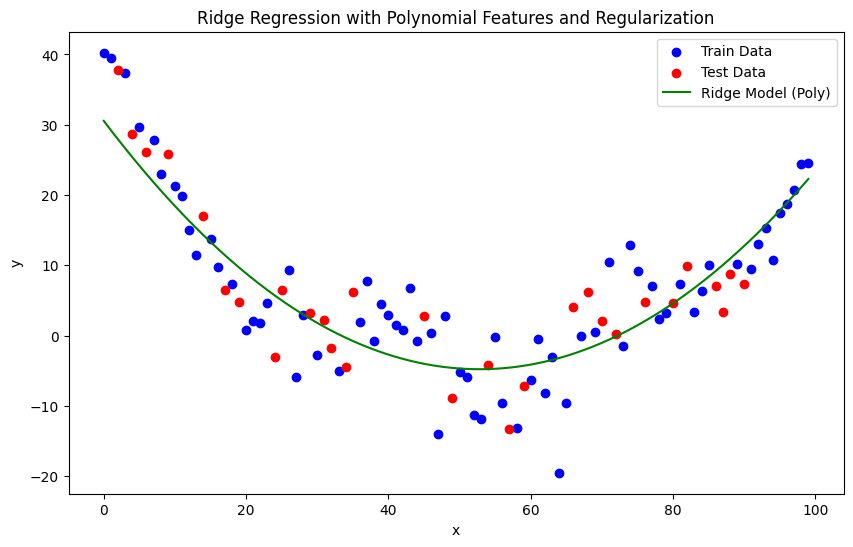

Ridge Regression (Train): MAE = 9.7861, MSE = 147.9429, R² = 0.0398
Ridge Regression (Test): MAE = 7.7520, MSE = 104.7213, R² = 0.1490


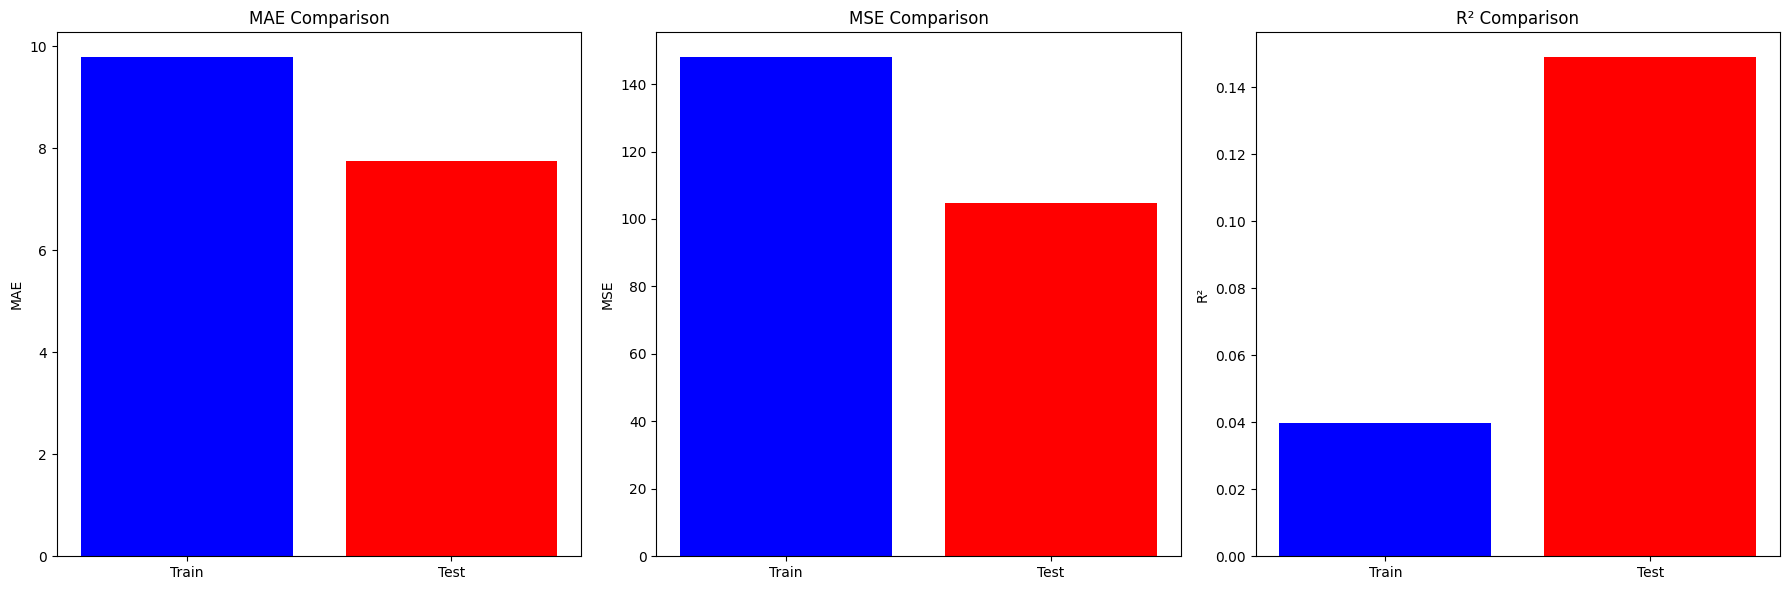

In [ ]:
# تبدیل داده‌ها به ویژگی‌های چند جمله‌ای
def polynomial_features(x, degree=2):
    X_poly = np.ones((x.shape[0], 1))
    for d in range(1, degree + 1):
        X_poly = np.column_stack([X_poly, x ** d])
    return X_poly

# مقیاس‌بندی داده‌ها
X2_train_poly = polynomial_features(x2_train)
X2_test_poly = polynomial_features(x2_test)

# تعریف رگولاریزیشن L2 (Ridge)
def ridge_regression(X, y, alpha=1.0):
    # محاسبه پارامترهای مدل با رگولاریزیشن L2
    X_transpose = X.T
    identity_matrix = np.eye(X.shape[1])
    theta = np.linalg.inv(X_transpose @ X + alpha * identity_matrix) @ (X_transpose @ y)
    return theta

# آموزش مدل با Ridge (L2)
theta_ridge = ridge_regression(X2_train_poly, X2_train, alpha=1)

# پیش‌بینی‌ها با مدل Ridge
y_pred_ridge = X2_test_poly @ theta_ridge

# محاسبه معیارها
mae_ridge = mean_absolute_error(X2_test, y_pred_ridge)
mse_ridge = mean_squared_error(X2_test, y_pred_ridge)
r2_ridge = r2_score(X2_test, y_pred_ridge)

# نتایج
print(f"Ridge Regression: MAE = {mae_ridge:.4f}, MSE = {mse_ridge:.4f}, R² = {r2_ridge:.4f}")

# رسم نمودار مرز جدایی
plt.figure(figsize=(10, 6))
plt.scatter(x2_train, X2_train, color='blue', label='Train Data')
plt.scatter(x2_test, X2_test, color='red', label='Test Data')
x_vals = np.linspace(min(x2), max(x2), 1000)
X_vals_poly = polynomial_features(x_vals)
y_vals_ridge = X_vals_poly @ theta_ridge
plt.plot(x_vals, y_vals_ridge, color='green', label='Ridge Model (Poly)')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Ridge Regression with Polynomial Features and Regularization')
plt.show()

# نمایش نتایج
print(f"Ridge Regression (Train): MAE = {mae_train:.4f}, MSE = {mse_train:.4f}, R² = {r2_train:.4f}")
print(f"Ridge Regression (Test): MAE = {mae_test:.4f}, MSE = {mse_test:.4f}, R² = {r2_test:.4f}")


# ترسیم نمودارها برای سه معیار
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# MAE
axs[0].bar(["Train", "Test"], [mae_train, mae_test], color=['blue', 'red'])
axs[0].set_title('MAE Comparison')
axs[0].set_ylabel('MAE')

# MSE
axs[1].bar(["Train", "Test"], [mse_train, mse_test], color=['blue', 'red'])
axs[1].set_title('MSE Comparison')
axs[1].set_ylabel('MSE')

# R²
axs[2].bar(["Train", "Test"], [r2_train, r2_test], color=['blue', 'red'])
axs[2].set_title('R² Comparison')
axs[2].set_ylabel('R²')

plt.tight_layout()
plt.show()